# 1.Data Preprocessing 

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder 

In [7]:

# import titanic datset
titanic = pd.read_excel('titanic.xls')

# head of the dataset
titanic.head(5)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [8]:
titanic.shape

(1309, 14)

In [9]:

# show general information of different columns 
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [10]:
# Finding the missing values 
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [11]:
# the total number of missing values
titanic.isnull().sum().sum()

3855

In [12]:

# replace the missing values 
titanic['age'].fillna(titanic['age'].mean(), inplace=True)
titanic['fare'].fillna(titanic['fare'].mean(),inplace=True)
titanic['cabin'].fillna('C23', inplace=True)
titanic['embarked'].fillna('S', inplace=True)

# drop the useless columns 
titanic.drop(['body', 'home.dest','boat'], axis=1, inplace=True)


In [19]:
# number of elements per category
titanic['embarked'].value_counts()

S    916
C    270
Q    123
Name: embarked, dtype: int64

In [14]:
titanic.isnull().sum().sum()

0

In [15]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


# 2. Data Visualization 

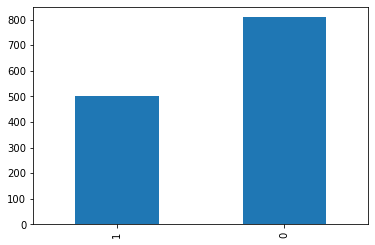

In [20]:

titanic['survived'].value_counts(ascending=True).plot.bar()


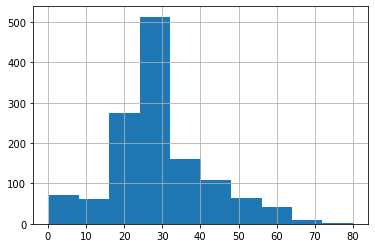

In [22]:

titanic['age'].hist()


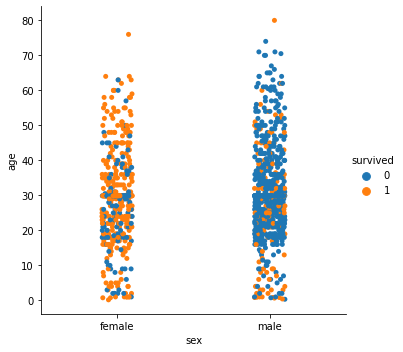

In [82]:

# the correlation between sex and age
sns.catplot(x='sex' , y='age', data=titanic , hue='survived')


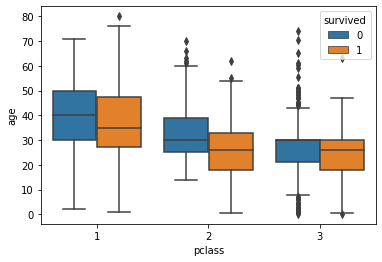

In [31]:

#the correlation between Sex and Age
sns.boxplot(x='pclass' , y='age' , data=titanic, hue='survived')


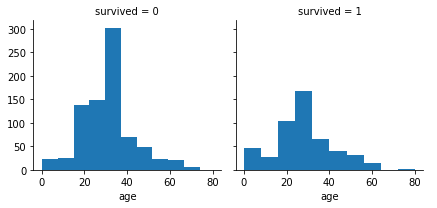

In [102]:
grid = sns.FacetGrid(titanic, col="survived")
grid.map(plt.hist,'age')
grid.add_legend()

In [94]:
def plot_correlation_map( titanic ):

    corr = titanic.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

this is a function that computes pairwise correlation of columns(titanic.corr()) and represents it   in the form of a color coded matrix.

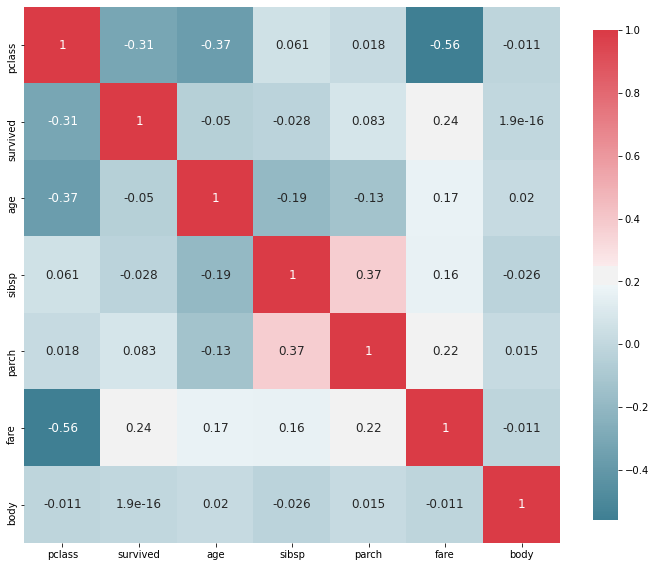

In [95]:
plot_correlation_map(titanic)

In [ ]:
there is no correlation between  fare and pclass,
there is a higher correlation between  parch  and sibsp.

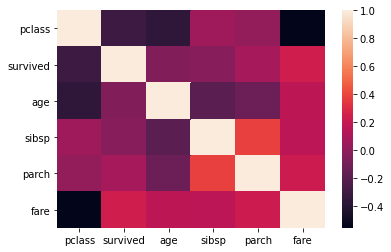

In [32]:
sns.heatmap(titanic.corr())

In [33]:
# the relation between survived and pclass
titanic[['survived']].groupby(titanic['pclass']).mean()

,survived
pclass,
1,0.619195
2,0.429603
3,0.255289


In [36]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


In [37]:
titanic['title']=titanic['name'].apply (lambda x: x.split()[1])
titanic.drop(['name'], axis=1, inplace=True)


In [40]:
titanic.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,Miss.
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,Master.
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,Miss.
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,Mr.
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,Mrs.


In [41]:
titanic[['age','fare']].groupby(titanic['title']).mean()

,age,fare
title,,
"Billiard,",27.293712,14.500000
"Brito,",32.000000,13.000000
Capt.,70.000000,71.000000
"Carlo,",26.500000,27.720800
Col.,54.000000,79.518750
"Cruyssen,",47.000000,9.000000
Don.,40.000000,27.720800
Dr.,41.860142,53.254688
"Gordon,",48.500000,48.264600


In [51]:
Title_Dictionary = {"title":
{
                    "Capt.":       "Officer",

                    "Col.":        "Officer",

                    "Major.":      "Officer",

                     "Dr.":        "Officer",
    
                    "Rev.":        "Officer",

                    "Jonkheer.":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Don.":       "Royalty",

                    "Mme.":        "Miss",

                    "Mlle.":       "Miss",

                    "Miss." :      "Miss",

                    "Ms.":         "Mrs",

                    "Mr." :        "Mrs",

                    "Mrs." :       "Mrs",

                    "Master." :    "Master"}

                    }

In [54]:
titanic.replace(Title_Dictionary, inplace=True)

In [55]:
titanic[['age', 'fare']].groupby(titanic['title']).mean()

,age,fare
title,,
"Billiard,",27.293712,14.500000
"Brito,",32.000000,13.000000
"Carlo,",26.500000,27.720800
"Cruyssen,",47.000000,9.000000
"Gordon,",48.500000,48.264600
"Impe,",25.333333,24.150000
"Khalil,",45.000000,7.225000
Master,8.275445,36.737286
"Melkebeke,",29.881135,9.500000


In [67]:
titanic['FamilySize']=titanic['sibsp'] + titanic['parch'] + 1

In [68]:
titanic.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,FamilySize
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,Miss,1
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,Master,4
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,Miss,4
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,Mrs,4
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,Mrs,4


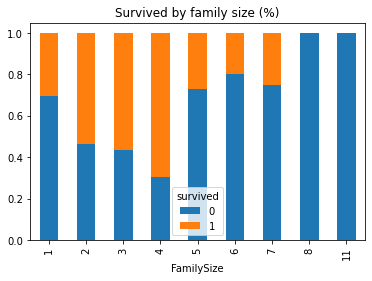

In [80]:

pd.crosstab(titanic['FamilySize'], titanic['survived'], normalize='index').plot(kind='bar', stacked=True, title="Survived by family size (%)")

For families from 1 to 4 people, family size increases survival rates. For families from 5 to 7 people, survival rates is much lower. But for families from 8 and 11 people survival rates = 0

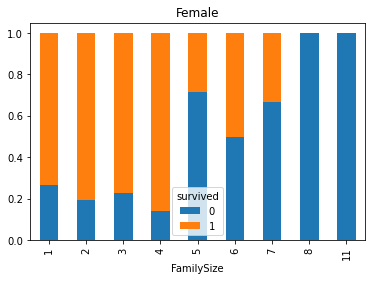

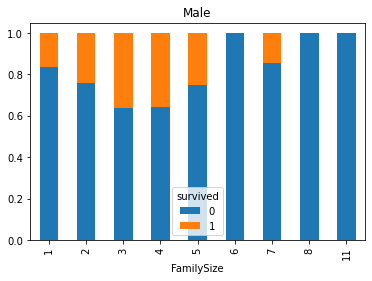

In [81]:
female = titanic[titanic['sex'] == 'female']
male = titanic[titanic['sex'] == 'male']
 

pd.crosstab(female['FamilySize'], female['survived'],  normalize = 'index').plot(kind='bar', stacked=True, title="Female")
pd.crosstab(male['FamilySize'], male['survived'], normalize = 'index').plot(kind='bar', stacked=True, title="Male")

For both sex, family sizes of 5 and up lead to low survival rates.
For females in families from 1 to 4 people, family size increases survival rates. But  for females in families of 5 and up, survival rates is much lower.